**AYO ! Can we predict the revenue of a movie ?!**

**General Idea about the DataSet**
In this kernel i'm working with TMDB Box Office DataSet which provides 7398 movies and a variety of metadata obtained from The Movie Database (TMDB). Movies are labeled with id. Data points include cast, crew, plot keywords, budget, posters, release dates, languages, production companies, and countries.

In [1]:
#Imports 
import lightgbm as lgb
import catboost as cat
import pandas as pd
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from tqdm import tqdm
from datetime import datetime
from sklearn.model_selection import GroupKFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import warnings
import os
print(os.listdir("../input"))
warnings.filterwarnings('ignore')
%matplotlib inline



random_seed = 2018

['tmdb-box-office-prediction', 'additionnal-features', 'release-dates']


In [2]:
train = pd.read_csv('../input/tmdb-box-office-prediction/train.csv')
test = pd.read_csv('../input/tmdb-box-office-prediction/test.csv')
sub = pd.read_csv('../input/tmdb-box-office-prediction/sample_submission.csv')
print(train.columns)
print(test.columns)


Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')
Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew'],
      dtype='object')


In [3]:
print(test.shape)
print(train.shape)

(4398, 22)
(3000, 23)


Ohooo , lets investigate and look closer into those two datasets


In [4]:
print("Number of NA Train for the variable budget : \n" + str(train[train.budget == 0].shape[0]) + "\n")
print("Number of NA Test for the variable budget : \n" + str(test[test.budget == 0].shape[0]))

Number of NA Train for the variable budget : 
812

Number of NA Test for the variable budget : 
1211


**We need some cleaning**

In [5]:
train.loc[train['id'] == 16,'revenue'] = 192864         
train.loc[train['id'] == 90,'budget'] = 30000000                  
train.loc[train['id'] == 118,'budget'] = 60000000       
train.loc[train['id'] == 149,'budget'] = 18000000       
train.loc[train['id'] == 313,'revenue'] = 12000000       
train.loc[train['id'] == 451,'revenue'] = 12000000      
train.loc[train['id'] == 464,'budget'] = 20000000       
train.loc[train['id'] == 470,'budget'] = 13000000       
train.loc[train['id'] == 513,'budget'] = 930000         
train.loc[train['id'] == 797,'budget'] = 8000000        
train.loc[train['id'] == 819,'budget'] = 90000000       
train.loc[train['id'] == 850,'budget'] = 90000000       
train.loc[train['id'] == 1007,'budget'] = 2              
train.loc[train['id'] == 1112,'budget'] = 7500000       
train.loc[train['id'] == 1131,'budget'] = 4300000        
train.loc[train['id'] == 1359,'budget'] = 10000000       
train.loc[train['id'] == 1542,'budget'] = 1             
train.loc[train['id'] == 1570,'budget'] = 15800000       
train.loc[train['id'] == 1571,'budget'] = 4000000        
train.loc[train['id'] == 1714,'budget'] = 46000000       
train.loc[train['id'] == 1721,'budget'] = 17500000       
train.loc[train['id'] == 1865,'revenue'] = 25000000      
train.loc[train['id'] == 1885,'budget'] = 12             
train.loc[train['id'] == 2091,'budget'] = 10             
train.loc[train['id'] == 2268,'budget'] = 17500000       
train.loc[train['id'] == 2491,'budget'] = 6              
train.loc[train['id'] == 2602,'budget'] = 31000000       
train.loc[train['id'] == 2612,'budget'] = 15000000       
train.loc[train['id'] == 2696,'budget'] = 10000000      
train.loc[train['id'] == 2801,'budget'] = 10000000       
train.loc[train['id'] == 335,'budget'] = 2 
train.loc[train['id'] == 348,'budget'] = 12
train.loc[train['id'] == 470,'budget'] = 13000000 
train.loc[train['id'] == 513,'budget'] = 1100000
train.loc[train['id'] == 640,'budget'] = 6 
train.loc[train['id'] == 696,'budget'] = 1
train.loc[train['id'] == 797,'budget'] = 8000000 
train.loc[train['id'] == 850,'budget'] = 1500000
train.loc[train['id'] == 1199,'budget'] = 5 
train.loc[train['id'] == 1282,'budget'] = 9              
train.loc[train['id'] == 1347,'budget'] = 1
train.loc[train['id'] == 1755,'budget'] = 2
train.loc[train['id'] == 1801,'budget'] = 5
train.loc[train['id'] == 1918,'budget'] = 592 
train.loc[train['id'] == 2033,'budget'] = 4
train.loc[train['id'] == 2118,'budget'] = 344 
train.loc[train['id'] == 2252,'budget'] = 130
train.loc[train['id'] == 2256,'budget'] = 1 
train.loc[train['id'] == 2696,'budget'] = 10000000

In [6]:
test.loc[test['id'] == 3033,'budget'] = 250 
test.loc[test['id'] == 3051,'budget'] = 50
test.loc[test['id'] == 3084,'budget'] = 337
test.loc[test['id'] == 3224,'budget'] = 4  
test.loc[test['id'] == 3594,'budget'] = 25  
test.loc[test['id'] == 3619,'budget'] = 500  
test.loc[test['id'] == 3831,'budget'] = 3  
test.loc[test['id'] == 3935,'budget'] = 500  
test.loc[test['id'] == 4049,'budget'] = 995946 
test.loc[test['id'] == 4424,'budget'] = 3  
test.loc[test['id'] == 4460,'budget'] = 8  
test.loc[test['id'] == 4555,'budget'] = 1200000 
test.loc[test['id'] == 4624,'budget'] = 30 
test.loc[test['id'] == 4645,'budget'] = 500 
test.loc[test['id'] == 4709,'budget'] = 450 
test.loc[test['id'] == 4839,'budget'] = 7
test.loc[test['id'] == 3125,'budget'] = 25 
test.loc[test['id'] == 3142,'budget'] = 1
test.loc[test['id'] == 3201,'budget'] = 450
test.loc[test['id'] == 3222,'budget'] = 6
test.loc[test['id'] == 3545,'budget'] = 38
test.loc[test['id'] == 3670,'budget'] = 18
test.loc[test['id'] == 3792,'budget'] = 19
test.loc[test['id'] == 3881,'budget'] = 7
test.loc[test['id'] == 3969,'budget'] = 400
test.loc[test['id'] == 4196,'budget'] = 6
test.loc[test['id'] == 4221,'budget'] = 11
test.loc[test['id'] == 4222,'budget'] = 500
test.loc[test['id'] == 4285,'budget'] = 11
test.loc[test['id'] == 4319,'budget'] = 1
test.loc[test['id'] == 4639,'budget'] = 10
test.loc[test['id'] == 4719,'budget'] = 45
test.loc[test['id'] == 4822,'budget'] = 22
test.loc[test['id'] == 4829,'budget'] = 20
test.loc[test['id'] == 4969,'budget'] = 20
test.loc[test['id'] == 5021,'budget'] = 40 
test.loc[test['id'] == 5035,'budget'] = 1 
test.loc[test['id'] == 5063,'budget'] = 14 
test.loc[test['id'] == 5119,'budget'] = 2 
test.loc[test['id'] == 5214,'budget'] = 30 
test.loc[test['id'] == 5221,'budget'] = 50 
test.loc[test['id'] == 4903,'budget'] = 15
test.loc[test['id'] == 4983,'budget'] = 3
test.loc[test['id'] == 5102,'budget'] = 28
test.loc[test['id'] == 5217,'budget'] = 75
test.loc[test['id'] == 5224,'budget'] = 3 
test.loc[test['id'] == 5469,'budget'] = 20 
test.loc[test['id'] == 5840,'budget'] = 1 
test.loc[test['id'] == 5960,'budget'] = 30
test.loc[test['id'] == 6506,'budget'] = 11 
test.loc[test['id'] == 6553,'budget'] = 280
test.loc[test['id'] == 6561,'budget'] = 7
test.loc[test['id'] == 6582,'budget'] = 218
test.loc[test['id'] == 6638,'budget'] = 5
test.loc[test['id'] == 6749,'budget'] = 8 
test.loc[test['id'] == 6759,'budget'] = 50 
test.loc[test['id'] == 6856,'budget'] = 10
test.loc[test['id'] == 6858,'budget'] =  100
test.loc[test['id'] == 6876,'budget'] =  250
test.loc[test['id'] == 6972,'budget'] = 1
test.loc[test['id'] == 7079,'budget'] = 8000000
test.loc[test['id'] == 7150,'budget'] = 118
test.loc[test['id'] == 6506,'budget'] = 118
test.loc[test['id'] == 7225,'budget'] = 6
test.loc[test['id'] == 7231,'budget'] = 85
test.loc[test['id'] == 5222,'budget'] = 5
test.loc[test['id'] == 5322,'budget'] = 90
test.loc[test['id'] == 5350,'budget'] = 70
test.loc[test['id'] == 5378,'budget'] = 10
test.loc[test['id'] == 5545,'budget'] = 80
test.loc[test['id'] == 5810,'budget'] = 8
test.loc[test['id'] == 5926,'budget'] = 300
test.loc[test['id'] == 5927,'budget'] = 4
test.loc[test['id'] == 5986,'budget'] = 1
test.loc[test['id'] == 6053,'budget'] = 20
test.loc[test['id'] == 6104,'budget'] = 1
test.loc[test['id'] == 6130,'budget'] = 30
test.loc[test['id'] == 6301,'budget'] = 150
test.loc[test['id'] == 6276,'budget'] = 100
test.loc[test['id'] == 6473,'budget'] = 100
test.loc[test['id'] == 6842,'budget'] = 30

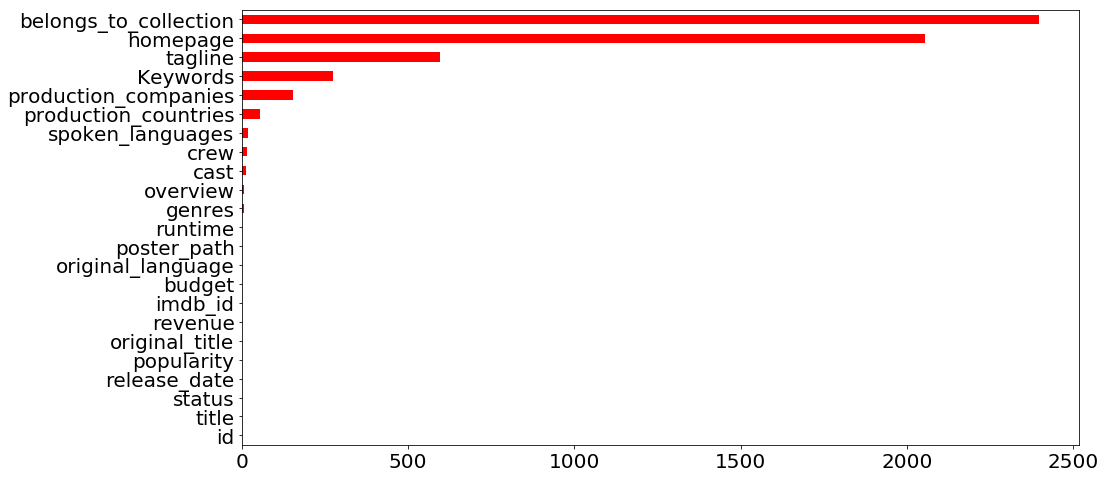

In [7]:
#Quick peak into NA columns

fig = plt.figure(figsize=(15, 8))
train.isna().sum().sort_values(ascending=True).plot(kind='barh',colors='red', fontsize=20)

**External Data (release dates , popularity and votes )**

Contains releases dates for every country.

In [8]:
release_dates = pd.read_csv('../input/release-dates/release_dates_per_country.csv')
release_dates['id'] = range(1,7399)
release_dates.drop(['original_title','title'],axis = 1,inplace = True)
release_dates.index = release_dates['id']
train = pd.merge(train, release_dates, how='left', on=['id'])
test = pd.merge(test, release_dates, how='left', on=['id'])

Additional features from Kamal Chhirang which contains more informations about movies (Votes , popularity)

In [9]:
trainAdditionalFeatures = pd.read_csv('../input/additionnal-features/TrainAdditionalFeatures.csv')[['imdb_id','popularity2','rating','totalVotes']]
testAdditionalFeatures = pd.read_csv('../input/additionnal-features/TestAdditionalFeatures.csv')[['imdb_id','popularity2','rating','totalVotes']]

train = pd.merge(train, trainAdditionalFeatures, how='left', on=['imdb_id'])
test = pd.merge(test, testAdditionalFeatures, how='left', on=['imdb_id'])

* **First things first: analysing 'revenue'**
'revenue' is the reason of our quest. It's like when we're going to a party. We always have a reason to be there. Usually, women are that reason. (disclaimer: adapt it to dancing, men or alcohol, according to your preferences)

Using the women approach, let's see the little story about 'How we met 'Revenue'.


In [10]:
corr_mat = train.corr()
corr_mat.revenue.sort_values(ascending=False)

revenue               1.000000
totalVotes            0.772349
budget                0.755986
popularity2           0.629664
theatrical            0.552502
popularity            0.461522
BG                    0.454652
DK                    0.420406
AU                    0.410968
NO                    0.408631
TR                    0.407173
TH                    0.405307
CZ                    0.402754
HU                    0.398329
SK                    0.389391
SE                    0.389328
DE                    0.389328
PT                    0.388949
GR                    0.387936
NL                    0.383005
FI                    0.379100
AR                    0.372967
IT                    0.371342
IL                    0.370477
KZ                    0.367663
HK                    0.361147
PL                    0.358258
MX                    0.349115
BE                    0.346610
CL                    0.346364
PE                    0.333934
CA                    0.328980
AT      

In [11]:
train['revenue'].describe()

count    3.000000e+03
mean     6.668176e+07
std      1.375149e+08
min      1.000000e+00
25%      2.401550e+06
50%      1.680707e+07
75%      6.877599e+07
max      1.519558e+09
Name: revenue, dtype: float64

In [12]:
train.head()


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,release_year,movie_id,theatrical,theatrical_limited,IT,DE,FR,UA,LV,US,PT,CZ,SE,DK,KZ,NL,RU,HK,CL,TW,IE,NO,GR,GB,AU,CA,AR,BE,TR,FI,TH,IS,SK,IL,PL,ID,MX,AT,SI,HU,KW,BG,PE,popularity2,rating,totalVotes
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2015,243938,6.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.400,5.0,482.0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,2004,11130,10.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.229,6.4,1528.0
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2014,244786,37.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.082,8.4,7314.0
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2012,82825,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.531,7.5,115.0
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', '

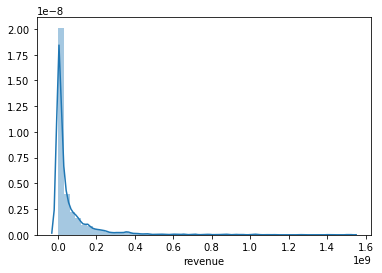

In [13]:
sns.distplot(train['revenue'])

Lets see which movie got the max revenue shall we ?

In [14]:
max_re= train[train['revenue']== max(train['revenue'])]
max_re.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,release_year,movie_id,theatrical,theatrical_limited,IT,DE,FR,UA,LV,US,PT,CZ,SE,DK,KZ,NL,RU,HK,CL,TW,IE,NO,GR,GB,AU,CA,AR,BE,TR,FI,TH,IS,SK,IL,PL,ID,MX,AT,SI,HU,KW,BG,PE,popularity2,rating,totalVotes
1126,1127,"[{'id': 86311, 'name': 'The Avengers Collectio...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://marvel.com/avengers_movie/,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,89.887648,/cezWGskPY5x7GaglTTRN4Fugfb8.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",4/25/12,143.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some assembly required.,The Avengers,"[{'id': 242, 'name': 'new york'}, {'id': 5539,...","[{'cast_id': 46, 'character': 'Tony Stark / Ir...","[{'credit_id': '52fe4495c3a368484e02b1cf', 'de...",1519557910,2012,24428,69.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,45.153,7.6,17988.0


Well seem's like The avengers got quite a great success ! Waiting for the END GAME , by the way 

Let's take a peak on the top 20 movies !

In [15]:
Train = train.copy()
Train.sort_values('revenue',ascending=False,inplace=True)
Train =Train.head(20)
Train[['title','popularity','budget','genres','revenue','release_date','production_companies']]

,title,popularity,budget,genres,revenue,release_date,production_companies
1126,The Avengers,89.887648,220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",1519557910,4/25/12,"[{'name': 'Paramount Pictures', 'id': 4}, {'na..."
1761,Furious 7,27.275687,190000000,"[{'id': 28, 'name': 'Action'}]",1506249360,4/1/15,"[{'name': 'Universal Pictures', 'id': 33}, {'n..."
2770,Avengers: Age of Ultron,37.379420,280000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",1405403694,4/22/15,"[{'name': 'Marvel Studios', 'id': 420}, {'name..."
684,Beauty and the Beast,287.253654,160000000,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",1262886337,3/16/17,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'..."
2322,Transformers: Dark of the Moon,4.503505,195000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",1123746996,6/28/11,"[{'name': 'Paramount Pictures', 'id': 4}, {'na..."
906,The Dark Knight Rises,20.582580,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",1084939099,7/16/12,"[{'name': 'Legendary Pictures', 'id': 923}, {'..."
2135,Pirates of the Caribbean: On Stranger Tides,27.887720,380000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",1045713802,5/14/11,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'..."
2562,Finding Dory,14.477677,200000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",1028570889,6/16/16,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'..."
881,Alice in Wonderland,17.285093,200000000,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",1025491110,3/3/10,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'..."
734,Zootopia,26.024868,150000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",1023784195,2/11/16,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'..."


What about the movie with the lowest revenue ?

In [16]:
min_re = train[train['revenue']== min(train['revenue'])]
min_re.sample()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,release_year,movie_id,theatrical,theatrical_limited,IT,DE,FR,UA,LV,US,PT,CZ,SE,DK,KZ,NL,RU,HK,CL,TW,IE,NO,GR,GB,AU,CA,AR,BE,TR,FI,TH,IS,SK,IL,PL,ID,MX,AT,SI,HU,KW,BG,PE,popularity2,rating,totalVotes
347,348,NaN,12,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",NaN,tt0118172,en,The Wind in the Willows,"Jailed for his reckless driving, rambunctious ...",1.410322,/nsOM52BsDeHzc0yI27bah2OWems.jpg,"[{'name': 'Allied Filmmakers', 'id': 1755}]","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",10/16/96,84.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Go wild in the country!,The Wind in the Willows,NaN,"[{'cast_id': 2, 'character': 'Toad', 'credit_i...","[{'credit_id': '59ce7655c3a3686aca01a522', 'de...",1,1996,47168,5.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.454,5.0,25.0


My sixth sense smells big correlation between the revenue and the initial budget lets check it closely 

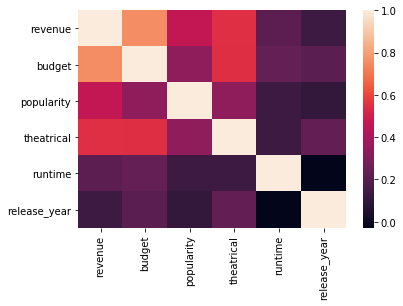

In [17]:
cols =['revenue','budget','popularity','theatrical','runtime','release_year']
sns.heatmap(train[cols].corr())
plt.show()

Guess i'm right , a big budget can guarantee a good revenue.

Text(0.5, 1.0, 'Link between revenue and budget')

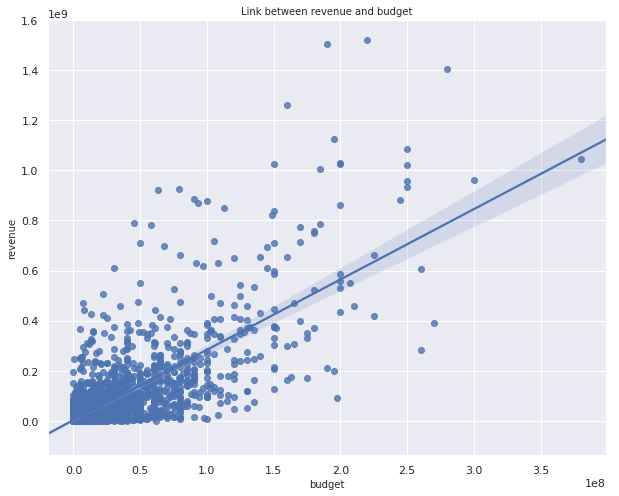

In [18]:
sns.set()
x = np.array(train["budget"])
y = np.array(train["revenue"])
fig = plt.figure(1, figsize=(10, 8))
#plt.plot([0,400000000],[0,1300000000],c="green")
sns.regplot(x, y)
plt.xlabel("budget", fontsize=10)  
plt.ylabel("revenue", fontsize=10)
plt.title("Link between revenue and budget", fontsize=10)

What about the relation between popularity and revenue 

Text(0.5, 1.0, 'Relationship between popularity and revenue of a movie')

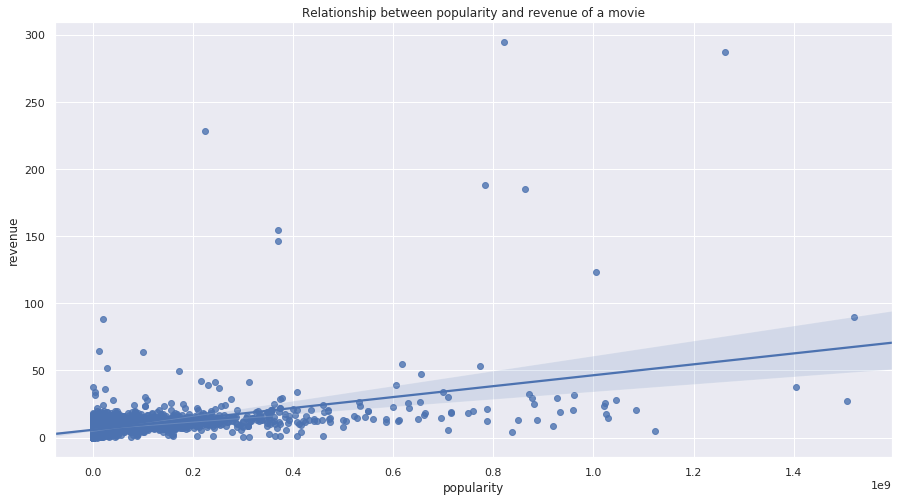

In [19]:
sns.set()
x=train['revenue']
y=train['popularity']
plt.figure(figsize=(15,8))
sns.regplot(x,y)
plt.xlabel('popularity')
plt.ylabel('revenue')
plt.title('Relationship between popularity and revenue of a movie')

Well we see clearly that Revenue depends on the popularity and the budget !

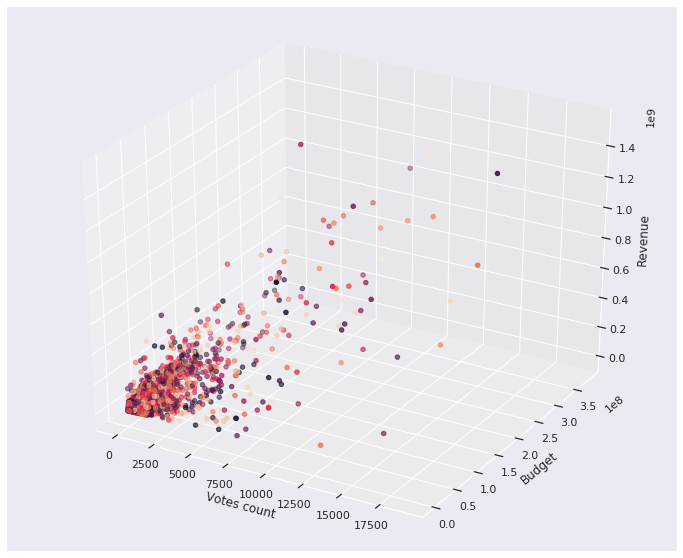

In [20]:
fig, ax = plt.subplots(1,2,figsize=(12,10))
plt.subplot(1,2,1)
np.random.seed(123)
ax = plt.subplot(projection='3d')
size = len(train)
colors= np.random.rand(size)
xs = np.array(train['totalVotes'])
ys = np.array(train['budget'])
zs = np.array(train['revenue'])
ax.scatter(xs,ys, zs,c=colors ,marker='o')
ax.set_xlabel('Votes count')
ax.set_ylabel('Budget')
ax.set_zlabel('Revenue')

plt.show()

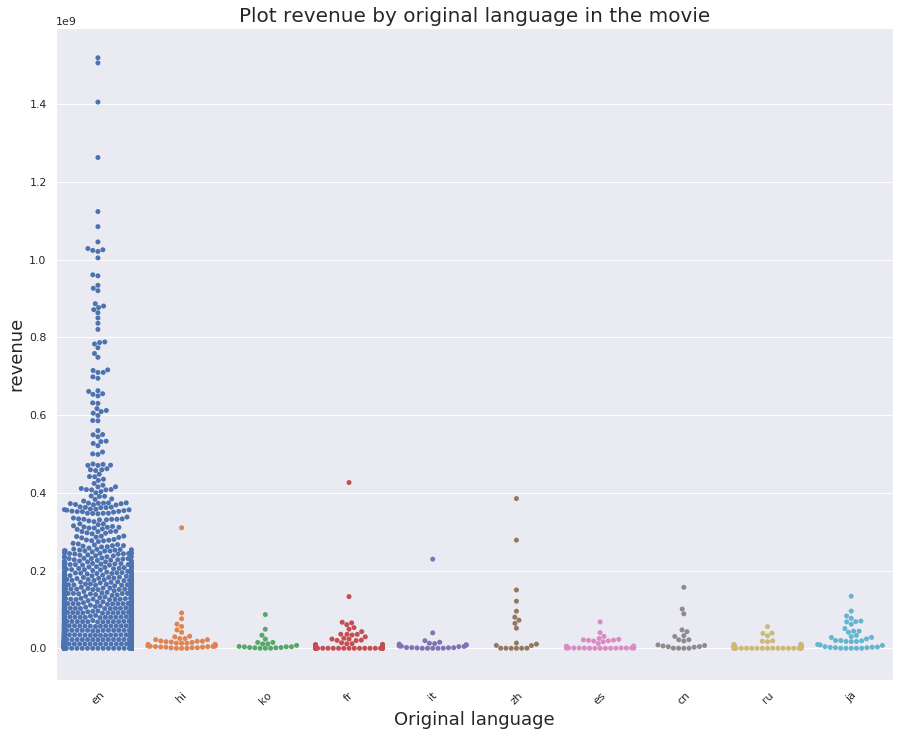

In [21]:
plt.figure(figsize=(15,12)) 
a1 = sns.swarmplot(x='original_language', y='revenue', 
                   data=train[(train['original_language'].isin((train['original_language'].value_counts()[:10].index.values)))])
a1.set_title("Plot revenue by original language in the movie", fontsize=20) 
a1.set_xticklabels(a1.get_xticklabels(),rotation=45) 
a1.set_xlabel('Original language', fontsize=18)
a1.set_ylabel('revenue', fontsize=18) 

plt.show()

Text(0.5, 1.0, 'Amount of movies launched every year')

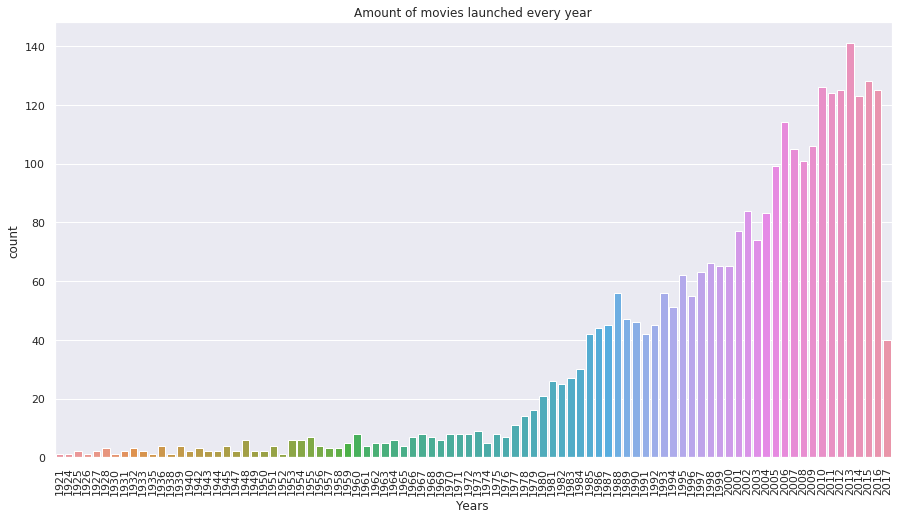

In [22]:
plt.figure(figsize=(15,8))
sns.countplot(train.release_year)
plt.xticks(rotation=90)
plt.xlabel('Years')
plt.title('Amount of movies launched every year')

In [23]:
def prepare(df):
    global json_cols
    global train_dict
    #Here we format the Date ex = 21/10/18 <=> to a column with the month , one with the day and one with year

    df[['release_month','release_day','release_year']]=df['release_date'].str.split('/',expand=True).replace(np.nan, 0).astype(int)
    df['release_year'] = df['release_year']
     #in this case we're interested with the year one ,in the format before we will have values like this : 14,15,17,18,19
    #to a better lecture we add a 2000 to values < 18 we're in 2019 right but the data doesnt contains 2019 movies
    #same thing for values more than 18 so they are in 19's range so we add 1900
    df.loc[ (df['release_year'] <= 18) & (df['release_year'] < 100), "release_year"] += 2000
    df.loc[ (df['release_year'] > 18)  & (df['release_year'] < 100), "release_year"] += 1900
    
    rating_na = df.groupby(["release_year","original_language"])['rating'].mean().reset_index()
    df[df.rating.isna()]['rating'] = df.merge(rating_na, how = 'left' ,on = ["release_year","original_language"])
    
    vote_count_na = df.groupby(["release_year","original_language"])['totalVotes'].mean().reset_index()
    df[df.totalVotes.isna()]['totalVotes'] = df.merge(vote_count_na, how = 'left' ,on = ["release_year","original_language"])
    
    

    df['budget'] = np.log1p(df['budget'])
    
    df['genders_0_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
    df['genders_1_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
    df['genders_2_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))

    
    df['_collection_name'] = df['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
    le = LabelEncoder()
    le.fit(list(df['_collection_name'].fillna('')))
    df['_collection_name'] = le.transform(df['_collection_name'].fillna('').astype(str))
    df['_num_Keywords'] = df['Keywords'].apply(lambda x: len(x) if x != {} else 0)
    df['_num_cast'] = df['cast'].apply(lambda x: len(x) if x != {} else 0)
    
    releaseDate = pd.to_datetime(df['release_date']) 
    df['release_dayofweek'] = releaseDate.dt.dayofweek 
    df['release_quarter'] = releaseDate.dt.quarter     

    df['_budget_runtime_ratio'] = df['budget']/df['runtime'] 
    df['_budget_popularity_ratio'] = df['budget']/df['popularity']
    df['_budget_year_ratio'] = df['budget']/(df['release_year']*df['release_year'])
    df['_releaseYear_popularity_ratio'] = df['release_year']/df['popularity']
    df['_releaseYear_popularity_ratio2'] = df['popularity']/df['release_year']


    df['meanruntimeByYear'] = df.groupby("release_year")["runtime"].aggregate('mean')
    df['meanPopularityByYear'] = df.groupby("release_year")["popularity"].aggregate('mean')
    df['meanBudgetByYear'] = df.groupby("release_year")["budget"].aggregate('mean')
    df['_popularity_theatrical_ratio'] = df['theatrical']/df['popularity']
    df['_budget_theatrical_ratio'] = df['budget']/df['theatrical']
    df['_popularity_totalVotes_ratio'] = df['totalVotes']/df['popularity']
    df['_totalVotes_releaseYear_ratio'] = df['totalVotes']/df['release_year']
    df['_budget_totalVotes_ratio'] = df['budget']/df['totalVotes']
    
    
    df['_rating_popularity_ratio'] = df['rating']/df['popularity']
    df['_rating_totalVotes_ratio'] = df['totalVotes']/df['rating']
    df['_budget_rating_ratio'] = df['budget']/df['rating']
    df['_runtime_rating_ratio'] = df['runtime']/df['rating']
    
    
    df['has_homepage'] = 0
    df.loc[pd.isnull(df['homepage']) ,"has_homepage"] = 1
    
    df['isbelongs_to_collectionNA'] = 0
    df.loc[pd.isnull(df['belongs_to_collection']) ,"isbelongs_to_collectionNA"] = 1
    
    df['isTaglineNA'] = 0
    df.loc[df['tagline'] == 0 ,"isTaglineNA"] = 1 

    df['isOriginalLanguageEng'] = 0 
    df.loc[ df['original_language'] == "en" ,"isOriginalLanguageEng"] = 1
    
    df['isTitleDifferent'] = 1
    df.loc[ df['original_title'] == df['title'] ,"isTitleDifferent"] = 0 

    df['isMovieReleased'] = 1
    df.loc[ df['status'] != "Released" ,"isMovieReleased"] = 0 

    # get collection id
    df['collection_id'] = df['belongs_to_collection'].apply(lambda x : np.nan if len(x)==0 else x[0]['id'])
    
    df['original_title_letter_count'] = df['original_title'].str.len() 
    df['original_title_word_count'] = df['original_title'].str.split().str.len() 


    df['title_word_count'] = df['title'].str.split().str.len()
    df['overview_word_count'] = df['overview'].str.split().str.len()
    df['tagline_word_count'] = df['tagline'].str.split().str.len()
    
    df['production_countries_count'] = df['production_countries'].apply(lambda x : len(x))
    df['production_companies_count'] = df['production_companies'].apply(lambda x : len(x))
    df['cast_count'] = df['cast'].apply(lambda x : len(x))
    df['crew_count'] = df['crew'].apply(lambda x : len(x))

    
    

    for col in ['genres', 'production_countries', 'spoken_languages', 'production_companies'] :
        df[col] = df[col].map(lambda x: sorted(list(set([n if n in train_dict[col] else col+'_etc' for n in [d['name'] for d in x]])))).map(lambda x: ','.join(map(str, x)))
        temp = df[col].str.get_dummies(sep=',')
        df = pd.concat([df, temp], axis=1, sort=False)
    df.drop(['genres_etc'], axis = 1, inplace = True)
    
    df = df.drop(['belongs_to_collection','genres','homepage','imdb_id','overview','runtime'
    ,'poster_path','production_companies','production_countries','release_date','spoken_languages'
    ,'status','title','Keywords','cast','crew','original_language','original_title','tagline', 'collection_id','movie_id'
    ],axis=1)
    
    df.fillna(value=0.0, inplace = True) 

    return df

In [24]:
test['revenue'] = np.nan

json_cols = ['genres', 'production_companies', 'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

for col in tqdm(json_cols + ['belongs_to_collection']) :
    train[col] = train[col].apply(lambda x : get_dictionary(x))
    test[col] = test[col].apply(lambda x : get_dictionary(x))

print(train.shape)
train.head()

100%|██████████| 8/8 [00:09<00:00,  1.20s/it]


(3000, 69)


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,release_year,movie_id,theatrical,theatrical_limited,IT,DE,FR,UA,LV,US,PT,CZ,SE,DK,KZ,NL,RU,HK,CL,TW,IE,NO,GR,GB,AU,CA,AR,BE,TR,FI,TH,IS,SK,IL,PL,ID,MX,AT,SI,HU,KW,BG,PE,popularity2,rating,totalVotes
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2015,243938,6.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.400,5.0,482.0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,2004,11130,10.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.229,6.4,1528.0
2,3,{},3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2014,244786,37.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.082,8.4,7314.0
3,4,{},1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,{},"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2012,82825,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.531,7.5,115.0
4,5,{},0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,{},"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,{},"[{'cast_id': 3, 'character': 'Chun-soo', 'cred..

In [25]:
# parse json data and build category dictionary
def get_json_dict(df) :
    global json_cols
    result = dict()
    for e_col in json_cols :
        d = dict()
        rows = df[e_col].values
        for row in rows :
            if row is None : continue
            for i in row :
                if i['name'] not in d :
                    d[i['name']] = 0
                d[i['name']] += 1
        result[e_col] = d
    return result

train_dict = get_json_dict(train)
test_dict = get_json_dict(test)

# remove cateogry with bias and low frequency
for col in json_cols :
    
    remove = []
    train_id = set(list(train_dict[col].keys()))
    test_id = set(list(test_dict[col].keys()))   
    
    remove += list(train_id - test_id) + list(test_id - train_id)
    for i in train_id.union(test_id) - set(remove) :
        if train_dict[col][i] < 10 or i == '' :
            remove += [i]
            
    for i in remove :
        if i in train_dict[col] :
            del train_dict[col][i]
        if i in test_dict[col] :
            del test_dict[col][i]
            
    print(col, 'size :', len(train_id.union(test_id)), '->', len(train_dict[col]))

genres size : 20 -> 19
production_companies size : 7087 -> 77
production_countries size : 98 -> 25
spoken_languages size : 64 -> 27
Keywords size : 11930 -> 358
cast size : 75944 -> 376
crew size : 68763 -> 516


In [26]:
print(test.columns)
print(train.columns)

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew',
       'release_year', 'movie_id', 'theatrical', 'theatrical_limited', 'IT',
       'DE', 'FR', 'UA', 'LV', 'US', 'PT', 'CZ', 'SE', 'DK', 'KZ', 'NL', 'RU',
       'HK', 'CL', 'TW', 'IE', 'NO', 'GR', 'GB', 'AU', 'CA', 'AR', 'BE', 'TR',
       'FI', 'TH', 'IS', 'SK', 'IL', 'PL', 'ID', 'MX', 'AT', 'SI', 'HU', 'KW',
       'BG', 'PE', 'popularity2', 'rating', 'totalVotes', 'revenue'],
      dtype='object')
Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runti

In [27]:
# prepare data
all_data = prepare(pd.concat([train, test]).reset_index(drop = True))
train = all_data.loc[:train.shape[0] - 1,:]
test = all_data.loc[train.shape[0]:,:]                           
print(train.shape)
train.head()

(3000, 242)


,AR,AT,AU,BE,BG,CA,CL,CZ,DE,DK,FI,FR,GB,GR,HK,HU,ID,IE,IL,IS,IT,KW,KZ,LV,MX,NL,NO,PE,PL,PT,RU,SE,SI,SK,TH,TR,TW,UA,US,budget,...,Metro-Goldwyn-Mayer (MGM),Millennium Films,Miramax Films,Morgan Creek Productions,NPV Entertainment,New Line Cinema,New Regency Pictures,Original Film,Orion Pictures,Paramount Pictures,Participant Media,Phoenix Pictures,PolyGram Filmed Entertainment,Regency Enterprises,Relativity Media,Revolution Studios,Scott Free Productions,Scott Rudin Productions,Screen Gems,Silver Pictures,Spyglass Entertainment,Studio Babelsberg,StudioCanal,Summit Entertainment,TF1 Films Production,TSG Entertainment,The Weinstein Company,Touchstone Pictures,TriStar Pictures,Twentieth Century Fox Film Corporation,UK Film Council,United Artists,Universal Pictures,Village Roadshow Pictures,Walt Disney Pictures,Warner Bros.,Wild Bunch,Wildwood Enterprises,Working Title Films,production_companies_etc
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16.454568,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,17.504390,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,15.009433,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.997833,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
features = list(train.columns)
features =  [i for i in features if i != 'id' and i != 'revenue']

**MODEL**

In [29]:
def score(data, y):
    validation_res = pd.DataFrame(
    {"id": data["id"].values,
     "transactionrevenue": data["revenue"].values,
     "predictedrevenue": np.expm1(y)})

    validation_res = validation_res.groupby("id")["transactionrevenue", "predictedrevenue"].sum().reset_index()
    return np.sqrt(mean_squared_error(np.log1p(validation_res["transactionrevenue"].values), 
                                     np.log1p(validation_res["predictedrevenue"].values)))

In [30]:
class KFoldValidation():
    def __init__(self, data, n_splits=5):
        unique_vis = np.array(sorted(data['id'].astype(str).unique()))
        folds = GroupKFold(n_splits)
        ids = np.arange(data.shape[0])
        
        self.fold_ids = []
        for trn_vis, val_vis in folds.split(X=unique_vis, y=unique_vis, groups=unique_vis):
            self.fold_ids.append([
                    ids[data['id'].astype(str).isin(unique_vis[trn_vis])],
                    ids[data['id'].astype(str).isin(unique_vis[val_vis])]
                ])
            
    def validate(self, train, test, features, model, name="", prepare_stacking=False, 
                 fit_params={"early_stopping_rounds": 500, "verbose": 100, "eval_metric": "rmse"}):
        model.FI = pd.DataFrame(index=features)
        full_score = 0
        
        if prepare_stacking:
            test[name] = 0
            train[name] = np.NaN
        
        for fold_id, (trn, val) in enumerate(self.fold_ids):
            devel = train[features].iloc[trn]
            y_devel = np.log1p(train["revenue"].iloc[trn])
            valid = train[features].iloc[val]
            y_valid = np.log1p(train["revenue"].iloc[val])
                       
            print("Fold ", fold_id, ":")
            model.fit(devel, y_devel, eval_set=[(valid, y_valid)], **fit_params)
            
            if len(model.feature_importances_) == len(features):  
                model.FI['fold' + str(fold_id)] = model.feature_importances_ / model.feature_importances_.sum()

            predictions = model.predict(valid)
            predictions[predictions < 0] = 0
            print("Fold ", fold_id, " error: ", mean_squared_error(y_valid, predictions)**0.5)
            
            fold_score = score(train.iloc[val], predictions)
            full_score += fold_score / len(self.fold_ids)
            print("Fold ", fold_id, " score: ", fold_score)
            if prepare_stacking:
                train[name].iloc[val] = predictions
                
                test_predictions = model.predict(test[features])
                test_predictions[test_predictions < 0] = 0
                test[name] += test_predictions / len(self.fold_ids)
                
        print("Final score: ", full_score)
        return full_score


In [31]:
Kfolder = KFoldValidation(train)

MODEls testing NVM


In [32]:
lgbmodel = lgb.LGBMRegressor(n_estimators=10000, 
                             objective='regression', 
                             metric='rmse',
                             max_depth = 5,
                             num_leaves=30, 
                             min_child_samples=100,
                             learning_rate=0.01,
                             boosting = 'gbdt',
                             min_data_in_leaf= 10,
                             feature_fraction = 0.9,
                             bagging_freq = 1,
                             bagging_fraction = 0.9,
                             importance_type='gain',
                             lambda_l1 = 0.2,
                             bagging_seed=random_seed, 
                             subsample=.8, 
                             colsample_bytree=.9,
                             use_best_model=True)

In [33]:
Kfolder.validate(train, test, features , lgbmodel, name="lgbfinal", prepare_stacking=True)

Fold  0 :
Training until validation scores don't improve for 500 rounds.
[100]	valid_0's rmse: 2.34629
[200]	valid_0's rmse: 2.16265
[300]	valid_0's rmse: 2.1042
[400]	valid_0's rmse: 2.07743
[500]	valid_0's rmse: 2.0608
[600]	valid_0's rmse: 2.05031
[700]	valid_0's rmse: 2.04303
[800]	valid_0's rmse: 2.03839
[900]	valid_0's rmse: 2.03561
[1000]	valid_0's rmse: 2.02993
[1100]	valid_0's rmse: 2.02732
[1200]	valid_0's rmse: 2.0263
[1300]	valid_0's rmse: 2.02471
[1400]	valid_0's rmse: 2.02434
[1500]	valid_0's rmse: 2.02353
[1600]	valid_0's rmse: 2.02287
[1700]	valid_0's rmse: 2.022
[1800]	valid_0's rmse: 2.02236
[1900]	valid_0's rmse: 2.02237
[2000]	valid_0's rmse: 2.02193
[2100]	valid_0's rmse: 2.02034
[2200]	valid_0's rmse: 2.0212
[2300]	valid_0's rmse: 2.02084
[2400]	valid_0's rmse: 2.02189
[2500]	valid_0's rmse: 2.022
[2600]	valid_0's rmse: 2.02265
Early stopping, best iteration is:
[2103]	valid_0's rmse: 2.02026
Fold  0  error:  2.020257874459141
Fold  0  score:  2.020257874459141
Fo

1.7993415394758276

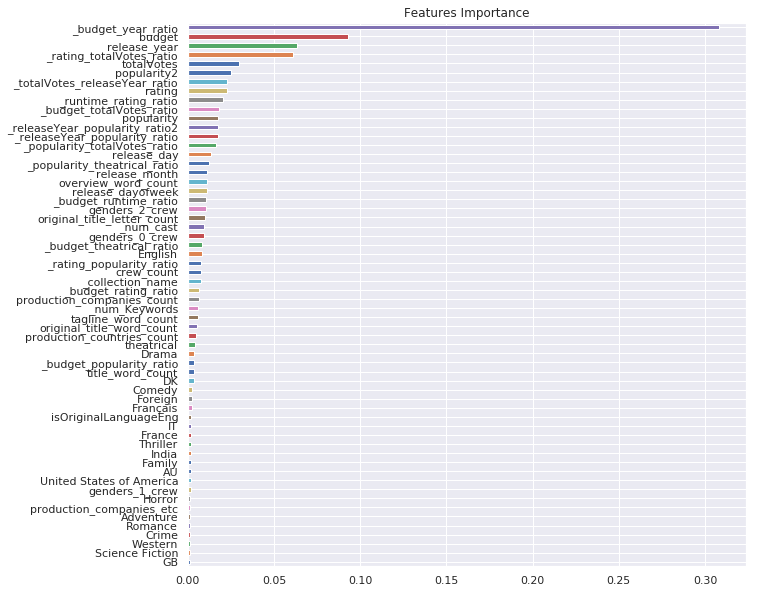

In [34]:
lgbmodel.FI.mean(axis=1).sort_values()[180:250].plot(kind="barh",title = "Features Importance", figsize = (10,10))

In [35]:
test['revenue'] =  np.expm1(test["lgbfinal"])
test[['id','revenue']].to_csv('submission_lgb.csv', index=False)
test[['id','revenue']].head()

,id,revenue
3000,3001,1.539911e+07
3001,3002,3.876987e+05
3002,3003,7.729597e+06
3003,3004,3.907106e+06
3004,3005,9.762959e+05


In [36]:
xgbmodel = xgb.XGBRegressor(max_depth=5, 
                            learning_rate=0.01, 
                            n_estimators=10000, 
                            objective='reg:linear', 
                            gamma=1.45, 
                            seed=random_seed, 
                            silent=True,
                            subsample=0.8, 
                            colsample_bytree=0.7, 
                            colsample_bylevel=0.5)



In [37]:
Kfolder.validate(train, test, features, xgbmodel, name="xgbfinal", prepare_stacking=True)

Fold  0 :
[0]	validation_0-rmse:15.5568
Will train until validation_0-rmse hasn't improved in 500 rounds.
[100]	validation_0-rmse:6.03922
[200]	validation_0-rmse:2.95684
[300]	validation_0-rmse:2.23356
[400]	validation_0-rmse:2.10804
[500]	validation_0-rmse:2.0831
[600]	validation_0-rmse:2.07062
[700]	validation_0-rmse:2.05814
[800]	validation_0-rmse:2.05158
[900]	validation_0-rmse:2.04701
[1000]	validation_0-rmse:2.04407
[1100]	validation_0-rmse:2.04066
[1200]	validation_0-rmse:2.03864
[1300]	validation_0-rmse:2.0355
[1400]	validation_0-rmse:2.03443
[1500]	validation_0-rmse:2.03394
[1600]	validation_0-rmse:2.03298
[1700]	validation_0-rmse:2.03224
[1800]	validation_0-rmse:2.03198
[1900]	validation_0-rmse:2.03178
[2000]	validation_0-rmse:2.03083
[2100]	validation_0-rmse:2.0302
[2200]	validation_0-rmse:2.0296
[2300]	validation_0-rmse:2.02939
[2400]	validation_0-rmse:2.0288
[2500]	validation_0-rmse:2.02907
[2600]	validation_0-rmse:2.0291
[2700]	validation_0-rmse:2.02842
[2800]	validation_

1.8300701687635603

In [38]:
catmodel = cat.CatBoostRegressor(iterations=10000, 
                                 learning_rate=0.01, 
                                 depth=5, 
                                 eval_metric='RMSE',
                                 colsample_bylevel=0.8,
                                 bagging_temperature = 0.2,
                                 metric_period = None,
                                 early_stopping_rounds=200,
                                 random_seed=random_seed)



In [39]:
Kfolder.validate(train, test, features , catmodel, name="catfinal", prepare_stacking=True,
               fit_params={"use_best_model": True, "verbose": 100})

Fold  0 :
0:	learn: 16.1172566	test: 16.0429688	best: 16.0429688 (0)	total: 65.8ms	remaining: 10m 58s
100:	learn: 6.3911190	test: 6.3540531	best: 6.3540531 (100)	total: 1.46s	remaining: 2m 22s
200:	learn: 3.1425179	test: 3.1968121	best: 3.1968121 (200)	total: 2.92s	remaining: 2m 22s
300:	learn: 2.2747629	test: 2.4302150	best: 2.4302150 (300)	total: 4.39s	remaining: 2m 21s
400:	learn: 2.0683350	test: 2.2730519	best: 2.2730519 (400)	total: 5.86s	remaining: 2m 20s
500:	learn: 1.9664340	test: 2.2184362	best: 2.2184362 (500)	total: 7.34s	remaining: 2m 19s
600:	learn: 1.8815266	test: 2.1773566	best: 2.1773566 (600)	total: 8.83s	remaining: 2m 18s
700:	learn: 1.8146660	test: 2.1507464	best: 2.1507464 (700)	total: 10.3s	remaining: 2m 16s
800:	learn: 1.7542118	test: 2.1309138	best: 2.1309138 (800)	total: 11.8s	remaining: 2m 15s
900:	learn: 1.6956793	test: 2.1141001	best: 2.1141001 (900)	total: 13.2s	remaining: 2m 13s
1000:	learn: 1.6511647	test: 2.1024208	best: 2.1023611 (999)	total: 14.7s	remai

1.8052975615380975

In [40]:
train['Revenue_Dragon1'] = 0.4 * train["lgbfinal"] + \
                               0.2 * train["xgbfinal"] + \
                               0.4 * train["catfinal"]

In [41]:
test['revenue'] =  np.expm1(0.4* test["lgbfinal"]+ 0.4 * test["catfinal"] + 0.2 * test["xgbfinal"])
test[['id','revenue']].to_csv('submission_Dragon1.csv', index=False)
test[['id','revenue']].head()

,id,revenue
3000,3001,9.612191e+06
3001,3002,7.495632e+05
3002,3003,6.084923e+06
3003,3004,5.285794e+06
3004,3005,9.270691e+05


Working on progress dont forget to upvote if you liked the kernel :p